# Term Structure Inflation Proxy-PCA Analysis

Analyzing the term PCA decompositive of each term structure. 

## Packages

In [4]:
import os
import sys
import pandas as pd

import matplotlib.pyplot as plt
from   matplotlib.ticker import FuncFormatter

In [5]:
sys.path.append(r"/Users/diegoalvarez/Desktop/research/CommodityInflationFactor/root/src")
from SpreadPCABetaFactor import SpreadPCABetaFactor

## Getting Data

In [7]:
def get_data() -> pd.DataFrame: 

    df_out = (pd.concat([
        SpreadPCABetaFactor().get_breakeven_pca().cumsum().assign(group = "breakeven"), 
        SpreadPCABetaFactor().get_inflation_swap_pca().cumsum().assign(group = "inflation")]))

    return df_out

df_data = get_data()

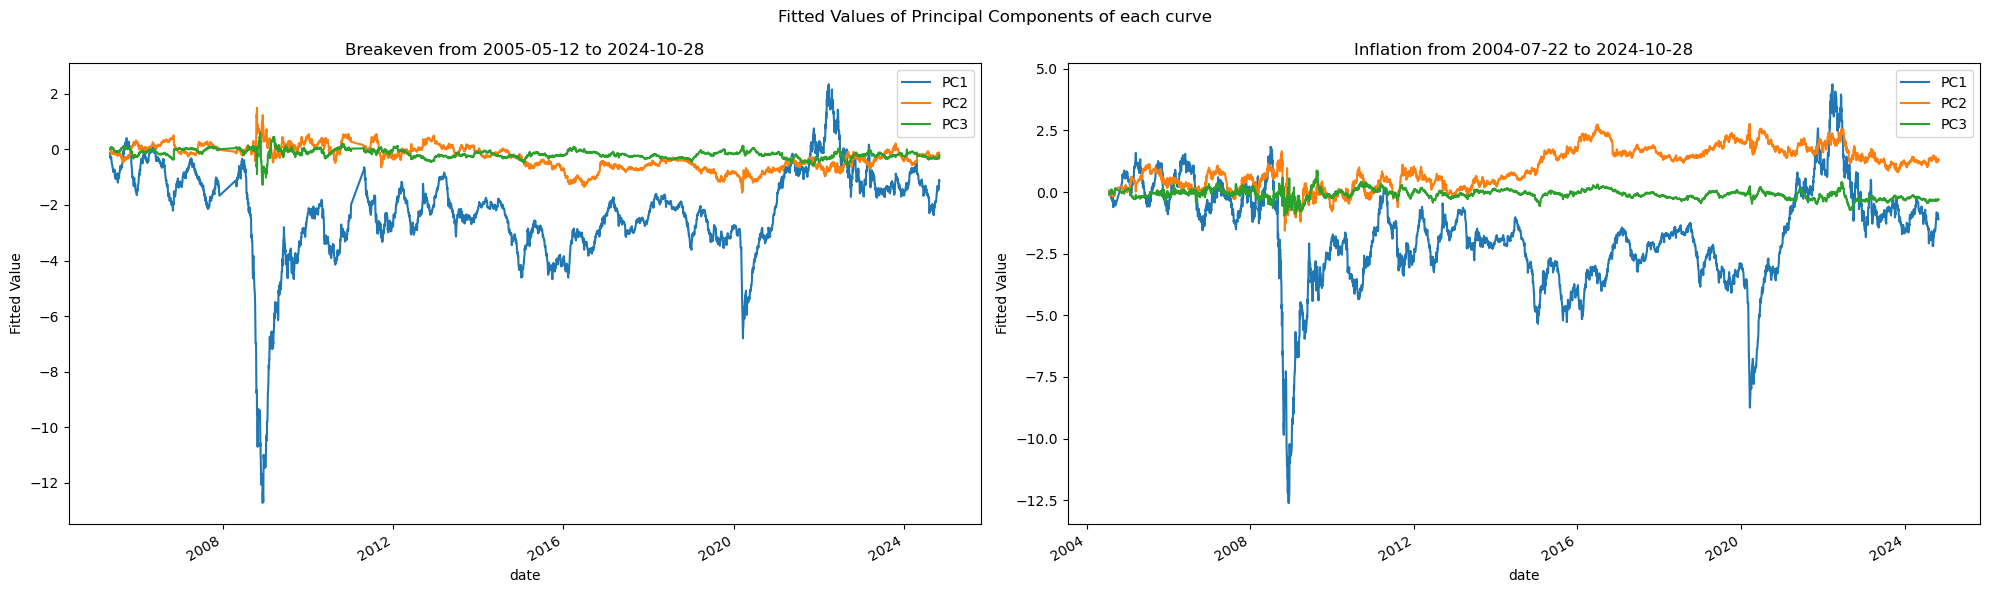

In [8]:
def plot_pca_fitted_values(df_data: pd.DataFrame) -> plt.Figure: 

    groups    = df_data.group.drop_duplicates().sort_values().to_list()
    fig, axes = plt.subplots(ncols = len(groups), figsize = (20,6))
    
    for group, ax in zip(groups, axes.flatten()):
    
        df_tmp = (df_data.query(
            "group == @group").
            drop(columns = ["group"]))
        
        (df_tmp.plot(
            ax     = ax,
            ylabel = "Fitted Value",
            title  = "{} from {} to {}".format(
                group.capitalize(),
                df_tmp.index.min().date(),
                df_tmp.index.max().date())))
    
    fig.suptitle("Fitted Values of Principal Components of each curve")
    plt.tight_layout()

plot_pca_fitted_values(df_data)

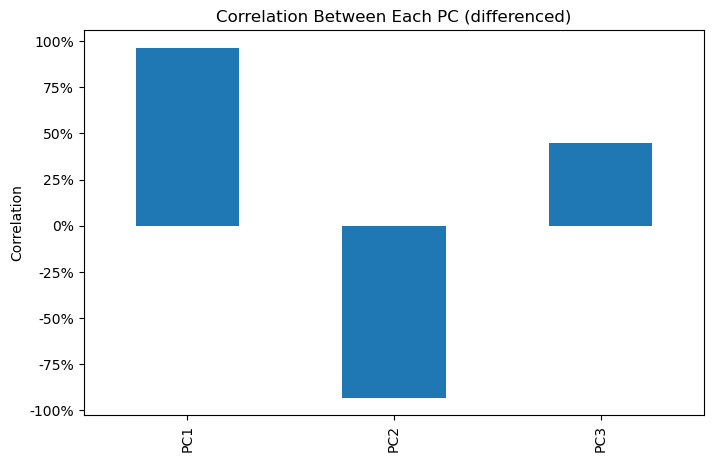

In [16]:
def plot_pca_correlation(df_data: pd.DataFrame) -> plt.Figure: 

    fig, axes = plt.subplots(figsize = (8,5))
    
    (df_data.reset_index().melt(
        id_vars = ["date", "group"]).
        pivot(index = ["date", "variable"], columns = "group", values = "value").
        dropna().
        reset_index().
        drop(columns = ["date"]).
        groupby("variable").
        agg("corr").
        reset_index().
        query("breakeven != 1").
        set_index("variable")
        [["breakeven"]].
        plot(
            title  = "Correlation Between Each PC (differenced)",
            kind   = "bar",
            ylabel = "Correlation",
            legend = False,
            xlabel = "",
            ax     = axes))
    
    axes.yaxis.set_major_formatter(FuncFormatter(lambda x, _: f"{x * 100:.0f}%"))

plot_pca_correlation(df_data)